In [1]:
from utils import dataset,PTA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
points = 10000
data = dataset(points)
X,y = data.get()
print("len(X)=",len(X)," len(y) ",len(y))

Generating dataset
len(X)= 10000  len(y)  10000


Generating dataset


[Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'), Text(0.5, 1.0, 'Noise = False')]

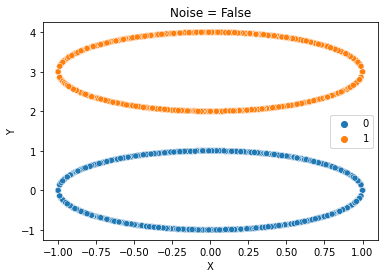

In [3]:
# Add_noise = False
X1,y1 = data.get()
falseplot = sns.scatterplot(X1[:,0],X1[:,-1],hue = y1)
falseplot.set(xlabel='X', ylabel='Y', title='Noise = False')

Generating dataset


[Text(0.5, 0, 'X'), Text(0, 0.5, 'Y'), Text(0.5, 1.0, 'Noise = True')]

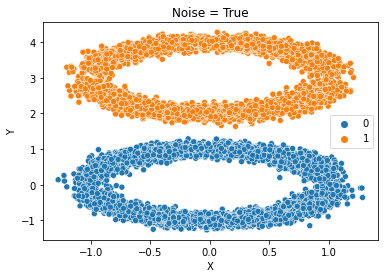

In [4]:
#Noise = True
X2,y2 = data.get(True)
trueplot = sns.scatterplot(X2[:,0],X2[:,-1],hue = y2)
trueplot.set(xlabel='X', ylabel='Y', title='Noise = True')

# PTA - Algorithm

In [5]:
# def PTA(X,y,bias_learnable = True):
#     weights = np.zeros(len(X[0]),dtype=float)
#     bias = 0 
    
#     convergence = 100 # max times pta is allowed to run , However i'll terminate it as soon as it stops making changes
#     iteration = 1
#     while(iteration<=convergence):
#         count = 0 # to see if no change is happpening
#         for i in range(len(X)): 
#             h = np.dot(X[i],weights) + bias
#             y_pred = 0
#             # signum func implementation
#             if(h >= 0):
#                 y_pred = 1
#             else:
#                 y_pred =-1

#             # Changing 0->-1 and 1->1
#             y_true = y[i]
#             if(y[i] == 0):
#                 y_true = -1

#             error_i =y_true - y_pred
            
#     #         print(error_i*X[0])
#             if(error_i == 0):
#                 count+=1
#             if(error_i != 0):
# #                 print(error_i)
#                 if(y_true)
#                 weights[0] = weights[0] + error_i * X[i][0]
#                 weights[1] = weights[1] + error_i * X[i][1]
#                 if(bias_learnable == True):
#                     bias = bias + error_i
# #                 print(weights,bias)
#         if(count==len(X)): # no updates happened 
#             print("No updates after",iteration,"iteration")
#             break
#         iteration+=1
#     return weights,bias






In [6]:
# weights,bias = PTA(X,y)
# print(weights,bias)

In [7]:
# def decisionBoundary(X,y,weights,bias):
#     sns.set(rc={'figure.figsize':(12,8)})

#     trueplot = sns.scatterplot(X[:,0],X[:,-1],hue = y)
#     # w0X+w1Y+bias => Y = -(w0/w1)X + -(bias/w1)
#     slope = -(weights[0]/weights[1])
#     intercept = -(bias/weights[1])

#     plt_x = np.array([-1.5,-1,0,1,1.5])
#     plt_y = plt_x*slope + intercept
#     trueplot = sns.lineplot(x = plt_x,y =plt_y,color='red',label = 'decision boundary')
#     trueplot.set(xlabel='X', ylabel='Y', title='addget = False')
# decisionBoundary(X,y,weights,bias)


# class plotBoundary:
#     def decisionBoundary(X,y,weights,bias):
#         sns.set(rc={'figure.figsize':(12,8)})

#         trueplot = sns.scatterplot(X[:,0],X[:,-1],hue = y)
#         # w0X+w1Y+bias => Y = -(w0/w1)X + -(bias/w1)
#         slope = -(weights[0]/weights[1])
#         intercept = -(bias/weights[1])

#         plt_x = np.array([-1.5,-1,0,1,1.5])
#         plt_y = plt_x*slope + intercept
#         trueplot = sns.lineplot(x = plt_x,y =plt_y,color='red',label = 'decision boundary')
#         trueplot.set(xlabel='X', ylabel='Y', title='Decision Boundary')

In [8]:
model = PTA()

No updates after 2 iteration
Model Trained


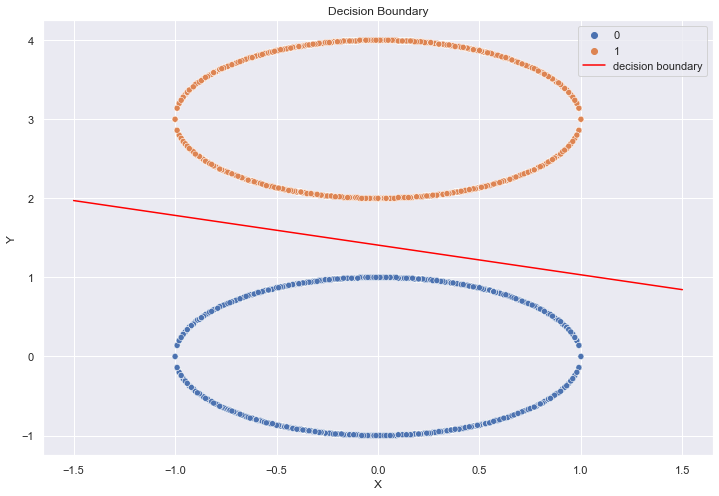

In [9]:
#Training PTA

#without noise
weights,bias = model.train(X1,y1)
model.decisionBoundary(X1,y1,weights,bias)

In [10]:
weights,bias

(array([1.6 , 4.26]), -6)

No updates after 3 iteration
Model Trained


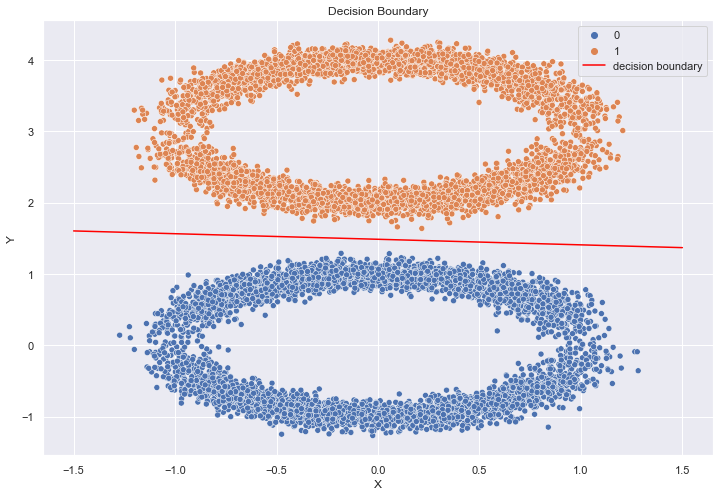

In [11]:
# with noise
weights,bias = model.train(X2,y2)
model.decisionBoundary(X2,y2,weights,bias)

# Q4. Fixed Bias

In [12]:
weights,bias = model.train(X1,y1,False) # false => bias is not learnable and remains zero
weights,bias

Model Trained


(array([-0.88, -1.38]), 0)

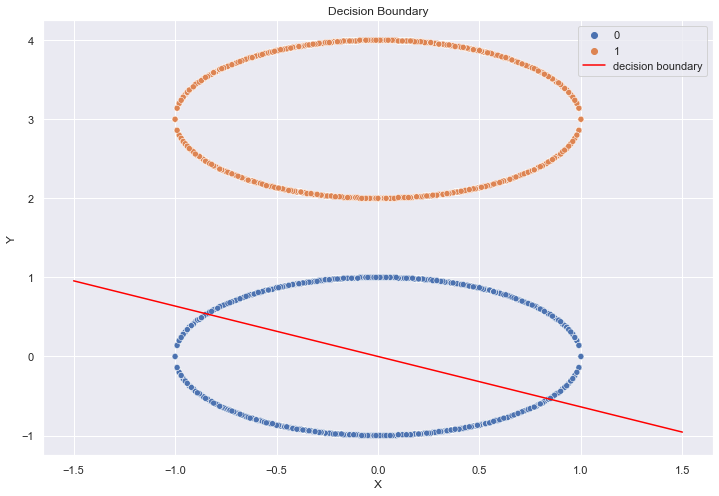

In [13]:
model.decisionBoundary(X1,y1,weights,bias)

# Q5

In [14]:
def decision_logic(x,y,output,bias_learnable = True):
    import seaborn as sns
    
    sns.scatterplot(x_plt,y_plt,hue = output,marker='X',s=200)
    ip = []
    for i in range(len(x)):
        ip.append([x[i],y[i]])
    weights,bias = model.train(ip,output,bias_learnable)
    print(weights[0],weights[0])
    slope = -(weights[0]/weights[1])
    intercept = -(bias/weights[1])
    if(bias_learnable  == False):
        intercept = 0
    print(slope,intercept)
    plt_x = np.array([-0.5,0,0.5,1,1.5])
#     plt_x = np.linspace(-1,1,100)
    plt_y = plt_x*slope + intercept
    sns.lineplot(x = plt_x,y =plt_y,color='red',label = 'decision boundary')

# XOR

Model Trained
-2.0 -2.0
inf nan


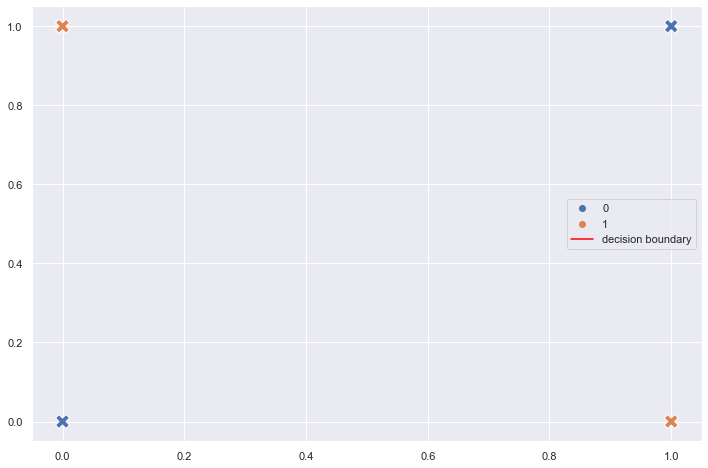

In [15]:

x_plt = [0,0,1,1] 
y_plt = [0,1,0,1]
xor_output = [0,1,1,0]

decision_logic(x_plt,y_plt,xor_output)


Model Trained
-2.0 -2.0
-1.0 0


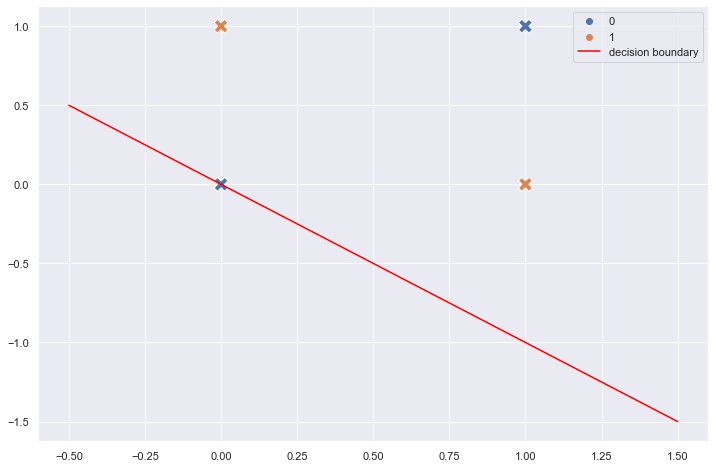

In [16]:
decision_logic(x_plt,y_plt,xor_output,False)

# AND

No updates after 6 iteration
Model Trained
4.0 4.0
-2.0 3.0


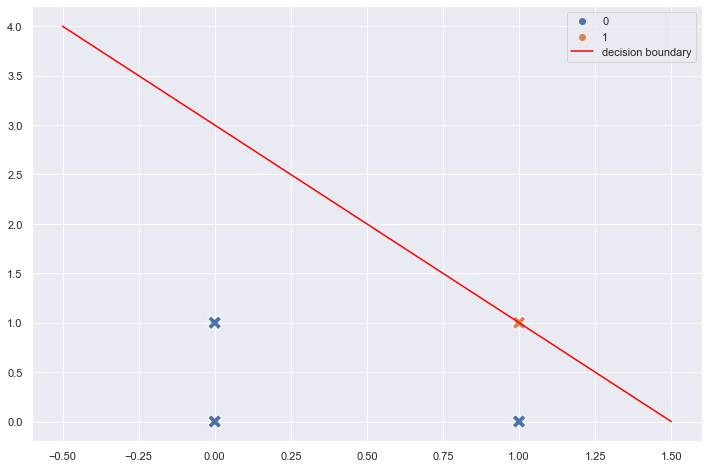

In [17]:
#AND
x_plt = [0,0,1,1] 
y_plt = [0,1,0,1]
and_output = [0,0,0,1]
# and_output = [-1,-1,-1,1]


decision_logic(x_plt,y_plt,and_output)
# PTA([[0,1],[0,1],[1,0],[1,1]],[0,0,0,1])

Model Trained
0.0 0.0
nan 0


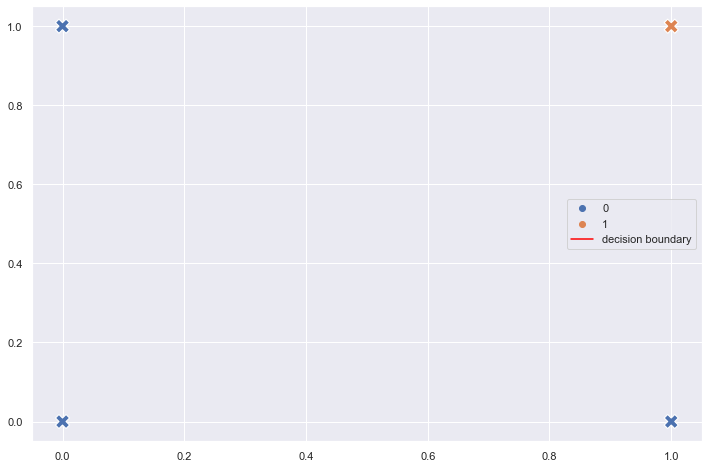

In [18]:
decision_logic(x_plt,y_plt,and_output,False)

# OR

No updates after 4 iteration
Model Trained
2.0 2.0
-1.0 1.0


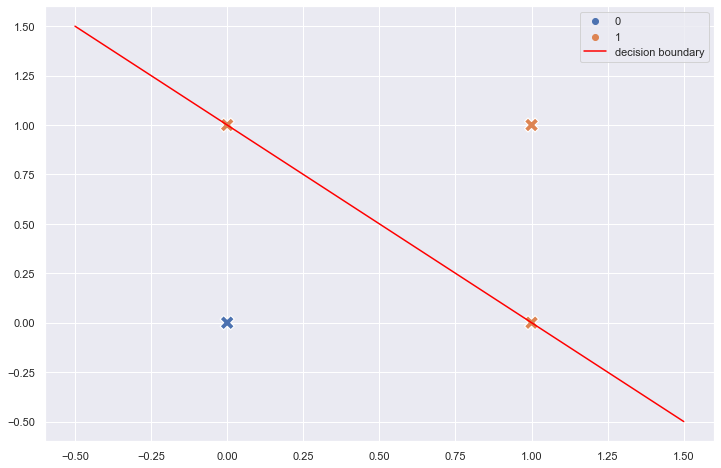

In [19]:
#OR
x_plt = [0,0,1,1] 
y_plt = [0,1,0,1]
or_output = [0,1,1,1]

decision_logic(x_plt,y_plt,or_output)

Model Trained
0.0 0.0
nan 0


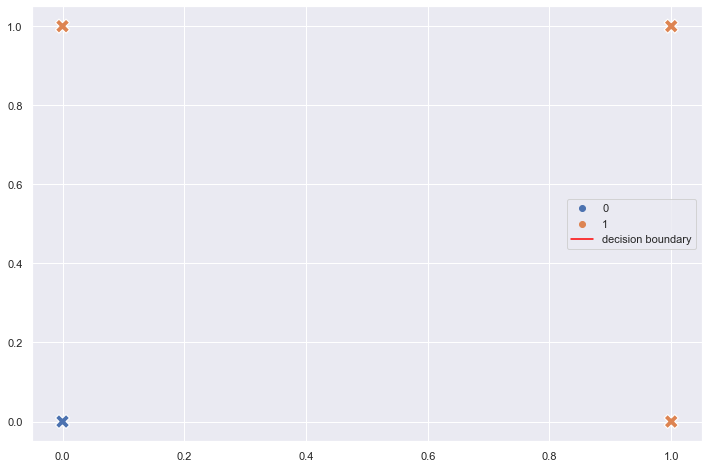

In [20]:
decision_logic(x_plt,y_plt,or_output,False)

In [21]:
# Q6
# Let y = Σwixi + b , be the equation of hyperplane in nth dimension.
# given a point (x) in R^n we will classify point as:
# 0 class if sgn(y) = -1 i.e y(x) < 0
# 1 class if sgn(y) = +1 i.e  y(x) >= 0

# Here sgn(v) = +1  if v>= 0
#               -1  if v<0

In [22]:
def gg(X,y,bias_learnable = True):
    weights = np.zeros(len(X[0]),dtype=float)
    bias = 0 
    
    convergence = 100 # max times pta is allowed to run , However i'll terminate it as soon as it stops making changes
    iteration = 1
    while(iteration<=1):
        count = 0 # to see if no change is happpening
        for i in range(len(X)): 
            h = np.dot(X[i],weights) + bias
            y_pred = 0
            
            # signum func implementation
            if(h >= 0):
                y_pred = 1
            else:
                y_pred =-1
            print("output and pred ",h,y_pred,end= " ")
            # Changing 0->-1 and 1->1
            y_true = y[i]
            if(y[i] == 0):
                y_true = -1

            error_i =y_true - y_pred
            print("Error:",error_i,end =" ")
    #         print(error_i*X[0])
            if(error_i == 0):
                count+=1
            if(error_i != 0):
              
                weights[0] = weights[0] + error_i * X[i][0]
                weights[1] = weights[1] + error_i * X[i][1]
                
                if(bias_learnable == True):
                    bias = bias + error_i
                print(weights,bias)
        if(count==len(X)): # no updates happened 
            print("No updates after",iteration,"iteration")
            break
        iteration+=1
    return weights,bias

In [23]:
x_plt = [0,0,1,1] 
y_plt = [0,1,0,1]
and_output = [0,0,0,1]
X = [[0,0],[0,1],[1,0],[1,1]]
gg(X,and_output,False)

output and pred  0.0 1 Error: -2 [0. 0.] 0
output and pred  0.0 1 Error: -2 [ 0. -2.] 0
output and pred  0.0 1 Error: -2 [-2. -2.] 0
output and pred  -4.0 -1 Error: 2 [0. 0.] 0


(array([0., 0.]), 0)